# News Articles Data Exploration

### Importing modules

In [1]:
import pandas as pd
import re

In [26]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     /Users/cristianoaguiar/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

### Loading data

In [2]:
dataset = pd.read_csv("../data_processed/news_articles_joined.csv", index_col=0)

### Data Cleaning

Removing articles where the content is not string.

In [3]:
mask_string = dataset["content"].apply(lambda x: isinstance(x, str))
dataset = dataset[mask_string]

Setting a columns with the size of each article content.

In [4]:
content_size = dataset["content"].apply(len)
dataset["content_size"] = content_size

Histogram of the size of each article.

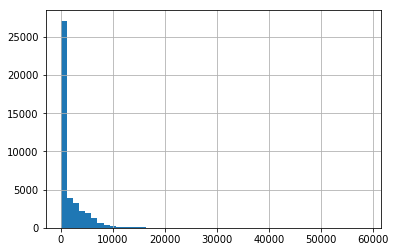

In [7]:
dataset["content_size"].hist(bins=50);

Content size description:

In [8]:
dataset["content_size"].describe()

count    41318.000000
mean      1664.157292
std       2876.323403
min          1.000000
25%         97.000000
50%        334.000000
75%       2345.750000
max      58442.000000
Name: content_size, dtype: float64

Selecting articles with more than 300 characters

In [9]:
mask_size = dataset["content_size"] > 300
dataset = dataset[mask_size]

New histogram

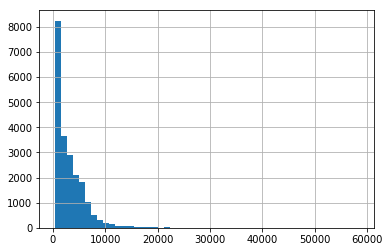

In [10]:
dataset["content_size"].hist(bins=50);

In [11]:
dataset["content_size"].describe()

count    21376.000000
mean      3113.315354
std       3411.037615
min        301.000000
25%        717.000000
50%       2229.500000
75%       4449.250000
max      58442.000000
Name: content_size, dtype: float64

Cleaning publication names

In [12]:
def clean_publication(publication):
    # Leaving only the domain
    return re.sub(r"(https?://)?(www([0-9])?\.)?", "", publication)

In [13]:
cleaned_publication = dataset["publication"].apply(clean_publication)

In [14]:
dataset["domain"] = cleaned_publication

In [15]:
dataset.head()

,title,publication,authors,date,year,month,url,content,content_size,domain
0,"Hillary Clinton: ‘China, if you’re listening, ...",https://www.washingtonpost.com,"['John Wagner', ""National Reporter Leading The...",05-02-2019,2019.0,5.0,https://www.washingtonpost.com/politics/hillar...,Hillary Clinton speaks at the Time 100 Summit ...,2114,washingtonpost.com
1,Exclusive: Foreign government leases at Trump ...,https://www.reuters.com,"['Julia Harte', 'Min Read']",05-02-2019,2019.0,5.0,https://www.reuters.com/article/us-usa-trump-e...,WASHINGTON (Reuters) - The U.S. State Departme...,8753,reuters.com
2,Trump's deal with Democrats leaves GOP rolling...,https://www.politico.com,"['Melanie Zanona', 'Burgess Everett', 'Megan C...",05-02-2019,2019.0,5.0,https://www.politico.com/story/2019/05/02/trum...,“I don’t see where the pay-fors will come from...,6213,politico.com
3,CNN Poll: Trump's approval rating on the econo...,https://www.cnn.com,['Grace Sparks'],05-02-2019,2019.0,5.0,https://www.cnn.com/2019/05/02/politics/cnn-po...,(CNN) President Donald Trump hits a new high o...,5689,cnn.com
4,Biden Faces Conflict of Interest Questions Tha...,https://www.nytimes.com,"['Kenneth P. Vogel', 'Iuliia Mendel']",05-01-2019,2019.0,5.0,https://www.nytimes.com/2019/05/01/us/politics...,The broad outlines of how the Bidens’ roles in...,1457,nytimes.com


### Pre selected news sources

In [16]:
conservative = {
    "Reason": "reason.com",
    "The Washington Times": "washingtontimes.com", 
    "National Review": "nationareview.com",
    "Washington Examiner": "washingtonexaminer.com",
    "The Federalist": "thefederalist.com",
    "Fox News": "foxnews.com",
    "New York Post": "nypost.com",
    "The Blaze": "theblaze.com",
    "The Daily Caller": "dailycaller.com",
    "The Daily Wire": "dailywire.com",
    "Spectator": "spectator.org"
}

In [17]:
liberal = {
    "The New Yorker": "newyorker.com",
    "Mother Jones": "motherjones.com",
    "Slate": "slate.com",
    "MSNBC": "msnbc.com",
    "CNN": "cnn.com",
    "The Washington Post": "washingtonpost.com",
    "The Guardian": "theguardian.com",
    "The New York Times": "nytimes.com",
    "The Atlantic": "theatlantic.com",
    "NBC News": "nbcnews.com"
}

In [18]:
selected_domains = [v for k, v in {**liberal, **conservative}.items()]

In [19]:
def check_contains(domain):
    response = False
    for check in selected_domains:
        if check in domain:
            response = True
    return response

In [20]:
mask = dataset["domain"].apply(check_contains)

In [21]:
selected_dataset = dataset[mask]

In [22]:
selected_dataset.shape

(5812, 10)